Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


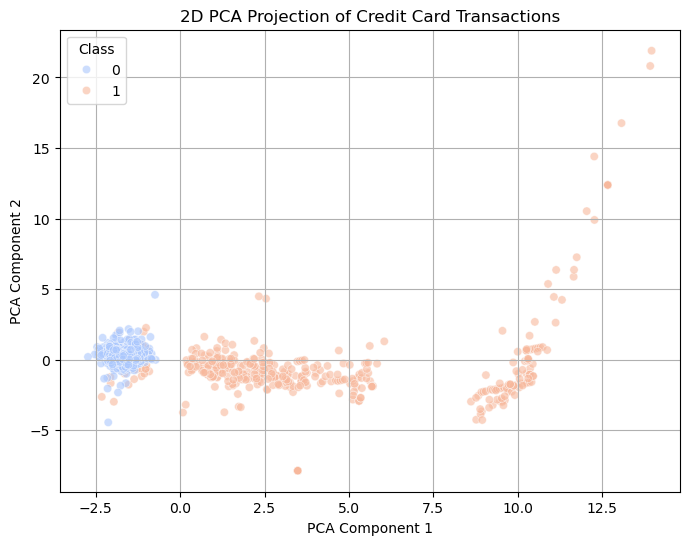


--- Training SVM with LINEAR kernel ---
Accuracy: 0.9431
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       200
           1       1.00      0.83      0.91        99

    accuracy                           0.94       299
   macro avg       0.96      0.91      0.93       299
weighted avg       0.95      0.94      0.94       299



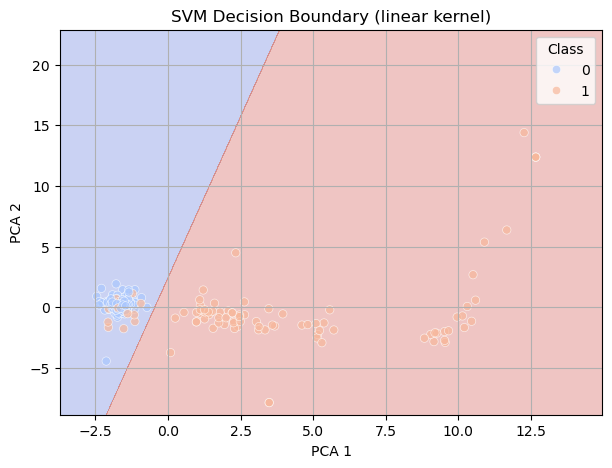


--- Training SVM with RBF kernel ---
Accuracy: 0.9398
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       200
           1       0.99      0.83      0.90        99

    accuracy                           0.94       299
   macro avg       0.95      0.91      0.93       299
weighted avg       0.94      0.94      0.94       299



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#Load dataset
df = pd.read_csv("C:/Users/kondu/Downloads/creditcard.csv (1)/creditcard.csv")

#Checking the  class imbalance
print("Class Distribution:\n", df['Class'].value_counts())

#Reducing the  imbalance for visualization by undersampling
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=1000, random_state=42)
balanced_df = pd.concat([fraud, non_fraud])

# Features and Labels
X = balanced_df.drop(columns=['Class', 'Time'])  # Drop 'Time' for modeling
y = balanced_df['Class']

#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA: Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm', alpha=0.6)
plt.title("2D PCA Projection of Credit Card Transactions")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

#Train SVM Models with different kernels
kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    print(f"\n--- Training SVM with {kernel.upper()} kernel ---")
    model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Visualize decision boundary
    h = 0.01
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, palette='coolwarm', alpha=0.7)
    plt.title(f"SVM Decision Boundary ({kernel} kernel)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

#Summary of results
print("\nSVM Kernel Accuracy Summary:")
for k, v in results.items():
    print(f"{k.capitalize()} Kernel: {v:.4f}")